In [2]:
import geopandas as gpd
import os
import sys

os.chdir(sys.path[3])
import pandas as pd
import numpy as np
import seaborn as sns
# sns.set(rc = {'figure.figsize':(15,15)})
import matplotlib.pyplot as plt
from pandas import DataFrame

## ethnic_origin

In [125]:
ethnic_origin = DataFrame(data['Q39'])
ethnic_origin = ethnic_origin.rename(columns={'Q39': 'ethnic_origin'}).reset_index()
ethnic_origin.groupby(by=["ethnic_origin"]).count().rename(columns={'index': 'count'})

,count
ethnic_origin,
"African (e.g., Moroccan, Ghanaian, South African, etc.)",19
"Asian (e.g., Chinese, Filipino, Korean, etc.)",84
"Caribbean (e.g., Cuban, Jamaican, Bajan, etc.)",4
"Central/South American (e.g., Mexican, Salvadorian, Argentinian, etc.)",51
"European (e.g., British Isles, German, French, Greek, Italian, etc.)",1271
I prefer to not answer,78
"Indigenous (First Nations, Metis, Inuk/Inuit, etc.)",11
"Middle Eastern (e.g., Lebanese, Iranian, Syrian, etc.)",16
Multi-ethnic (2+ ethnic groups),99


In [142]:
ethnic_origin_2 = data[data['Q39'] == 'Other (please specify):']
ethnic_origin_2 = DataFrame(ethnic_origin_2['Q39_10_TEXT'])
ethnic_origin_2 = ethnic_origin_2.rename(columns={'Q39_10_TEXT': 'ethnic_origin_other'}).reset_index()
ethnic_origin_2.groupby(by=["ethnic_origin_other"]).count().rename(columns={'index': 'count'})

,count
ethnic_origin_other,
African American,2
American,3
American,1
Ashkenazi Jewish,2
Black,2
Black American,1
"Black, African-American",1
Canadian,2
Canadian,3



### education

In [126]:
education = DataFrame(data['Q38'])
education = education.rename(columns={'Q38': 'education'}).reset_index()
education.groupby(by=["education"]).count().rename(columns={'index': 'count'})

,count
education,
"Associate’s/vocational/technical degree (2- or 3-year degree, trades certificate) \t",110
Bachelor’s degree (university 4-year degree) \t,672
"Graduate degree (e.g., Master’s, Professional degree, Doctorate)",714
"Graduated high school (i.e., High school diploma) \t",53
I prefer to not answer,26
Some high school or less \t,32
Some university (no degree),124


## income

In [118]:
income = DataFrame(data['Q36'])
income = income.rename(columns={'Q36': 'income'}).reset_index()
income.groupby(by=["income"]).count().rename(columns={'index': 'count'})

,count
income,
"$200,000 or more per year",362
"Between $100,000 and $149,999 per year",272
"Between $150,000 and $199,999 per year",174
"Between $20,000 and $34,999 per year",111
"Between $35,000 and $49,999 per year",94
"Between $50,000 and $74,999 per year",223
"Between $75,000 and $99,999 per year",231
Don’t know/not sure,17
I prefer to not answer,160


## Gender

In [119]:

gender = DataFrame(data['Q35'])

gender = gender.rename(columns={'Q35': 'gender'}).reset_index()
gender.groupby(by=["gender"]).count().rename(columns={'index': 'count'})


,count
gender,
Man,1060
Non-binary / third gender,21
Prefer not to say,35
Woman,614


<AxesSubplot:xlabel='gender', ylabel='Count'>

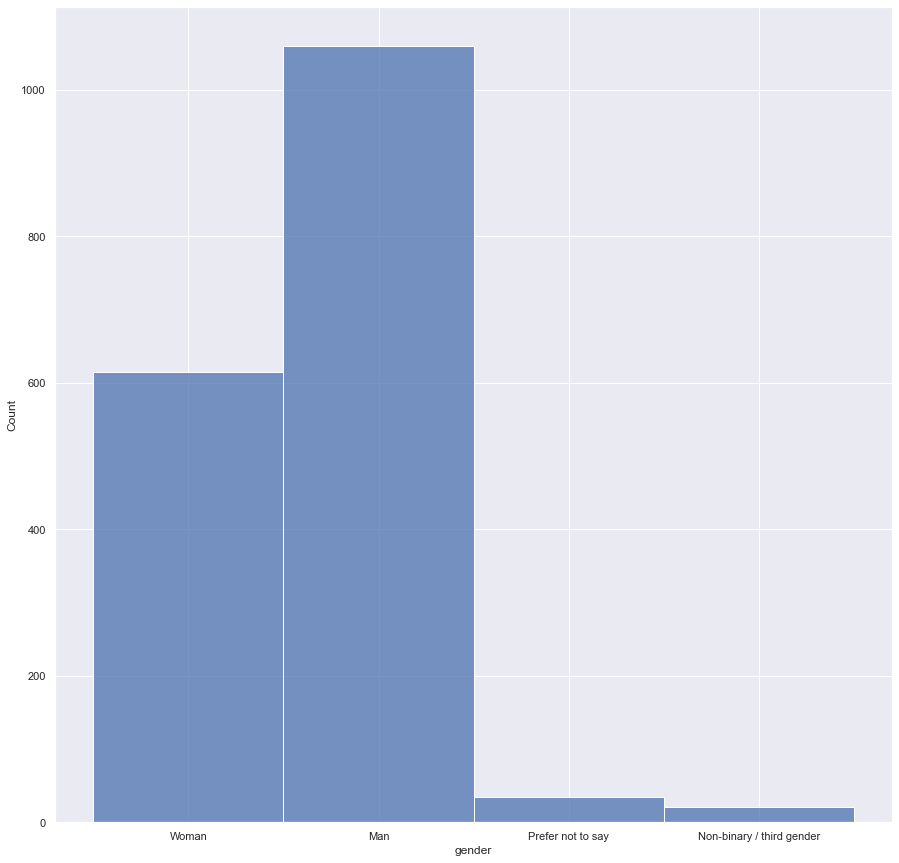

In [120]:
sns.histplot(data=gender, x='gender')

In [3]:
def analysis(my_data: DataFrame, old_name: str, new_name: str, is_state: str = False):
    if not is_state:
        rel_demographic = DataFrame(my_data[old_name])
    else:
        rel_demographic = DataFrame(my_data[my_data['state'] == is_state][old_name])
    rel_demographic = rel_demographic.rename(columns={old_name: new_name})
    rel_demographic = rel_demographic[rel_demographic[new_name].notna()].reset_index()
    return rel_demographic

### Upload Data

In [4]:
data_general = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()


## Data by:
1. California
2. Alberta
3. Washington

## stolen_bikes_place to City/State/Country

In [5]:
new_file_path = r'data/process/res_stolen_loc_splitted.csv'

In [ ]:
df = pd.read_csv(r'data/process/res_with_geo_loc.csv')
df[['city', 'state', 'country']] = df['stolen_bikes_place'].str.split(',', expand=True)
df.to_csv(new_file_path)

In [6]:
data_states = pd.read_csv(new_file_path, skiprows=[1, 2]).reset_index()

### Age

In [9]:
age = analysis(data_general, old_name='Q34', new_name='year')
sumy = age.groupby(by=['year']).count().rename(columns={'index': 'total'})
for name in ['California','Alberta','Washington']:
    age = analysis(data_states, old_name='Q34', new_name='year',is_state=name)
    sum_temp = age.groupby(by=['year']).count().rename(columns={'index': 'total'})
    sumy[name] = sum_temp
sumy.index= sumy.index.astype('int32', )
sumy = sumy.fillna(0).astype('int32')
sumy

,total,California,Alberta,Washington
year,,,,
1935,1,0,0,0
1938,1,0,0,0
1943,2,0,0,0
1944,3,0,0,0
1945,1,0,0,0
...,...,...,...,...
2008,3,0,0,0
2009,1,0,0,0
2010,3,0,0,0


In [16]:
sumy.describe().astype('int32')

,total,California,Alberta,Washington
count,72,72,72,72
mean,23,0,0,0
std,19,0,0,0
min,1,0,0,0
25%,8,0,0,0
50%,19,0,0,0
75%,36,0,0,0
max,74,0,0,0


<AxesSubplot:xlabel='year'>

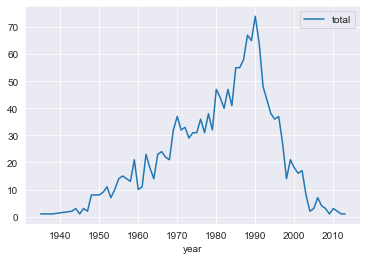

In [11]:
sumy.plot()